# Import data

In [184]:
import pandas as pd
df = pd.read_csv('df_advdlproject.csv')

In [185]:
df_train = pd.read_csv('train_advdlproject.csv')
df_val = pd.read_csv('val_advdlproject.csv')
df_test = pd.read_csv('test_advdlproject.csv')

In [187]:
df_train_data = df.loc[df['imdb_id'].isin(df_train['imdb_id'])]
df_test_data = df.loc[df['imdb_id'].isin(df_test['imdb_id'])]
df_val_data = df.loc[df['imdb_id'].isin(df_val['imdb_id'])]

In [194]:
df_train_val = pd.concat([df_train_data,df_val_data],axis=0)

In [157]:
df.columns

Index(['imdb_id', 'runtimeMinutes', 'genres', 'cast', 'averageRating',
       'numVotes', 'title', 'original_title', 'overview', 'release_date',
       'poster_link', 'revenue_worldwide_BOM', 'director', 'countries',
       'country codes', 'language codes', 'languages', 'Budget', 'cover url',
       'production companies'],
      dtype='object')

## Output :

#### 15 : averageRating
#### 14 : revenue_worldwide_BOM
------

## input

#### 1 : title - try embedding ?
#### 2 : genres - try embedding ? and break into columns 
#### 3 : cast - break into columns or reduce the dimensions after spreading into unique columns
#### 4 : director - break into columns or reduce the dimensions after spreading into unique columns
#### 5 : runtimeMinutes - numerical 
#### 6 : overview -- Sameer
#### 7 : budget - numerical 
#### 8 : production_companies  - break into columns or reduce the dimensions after spreading into unique columns
#### 9 : release_date - ??
#### 10 : languages - break into columns or reduce the dimensions after spreading into unique columns
#### 11: poster_link -- Srujan

In [158]:
df.head()

,imdb_id,runtimeMinutes,genres,cast,averageRating,numVotes,title,original_title,overview,release_date,poster_link,revenue_worldwide_BOM,director,countries,country codes,language codes,languages,Budget,cover url,production companies
0,35423.0,118,comedy|fantasy|romance,meg ryan|hugh jackman|liev schreiber,6.4,83205.0,Kate & Leopold,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,2001-12-25,https://images-na.ssl-images-amazon.com/images...,76019048.0,james mangold,united states,us,en|fr,english|french,48000000.0,https://m.media-amazon.com/images/M/MV5BNmNlN2...,konrad pictures|miramax
1,79285.0,88,adventure|horror|sci-fi,farrah fawcett|kirk douglas|harvey keitel,5.1,9337.0,Saturn 3,Saturn 3,"In the future, Earth is overcrowded and the po...",1980-02-15,NaN,9000000.0,stanley donen|john barry,united kingdom,gb,en,english,10000000.0,https://m.media-amazon.com/images/M/MV5BOGU1MD...,itc films|elliott kastner productions|transcon...
2,79302.0,90,comedy,nancy allen|mary davenport|kirk douglas,5.1,911.0,Home Movies,Home Movies,A cult guru urges a shy disciple to make life ...,1980-05-16,https://images-na.ssl-images-amazon.com/images...,89134.0,brian de palma,united states,us,en,english,400000.0,https://m.media-amazon.com/images/M/MV5BNWY4ZD...,NaN
3,80339.0,88,comedy,robert hays|julie hagerty|leslie nielsen,7.7,231364.0,Airplane!,Airplane!,"Alcoholic pilot, Ted Striker has developed a f...",1980-02-07,https://images-na.ssl-images-amazon.com/images...,83453539.0,jim abrahams|david zucker|jerry zucker,united states,us,en,english,3500000.0,https://m.media-amazon.com/images/M/MV5BZjA3Yj...,paramount pictures|howard w. koch productions
4,80360.0,102,horror|sci-fi|thriller,william hurt|blair brown|bob balaban,6.9,34558.0,Altered States,Altered States,A research scientist (William Hurt) explores t...,1980-12-25,https://images-na.ssl-images-amazon.com/images...,19853892.0,ken russell,united states,us,en|es,english|spanish,NaN,https://m.media-amazon.com/images/M/MV5BZTdkOT...,warner bros.


## Looking at relation between numerical columns and rating/revenue

#### Budget

In [16]:
non_null_budget = df[df['budget']!=0]

In [17]:
non_null_budget.shape

(5003, 17)

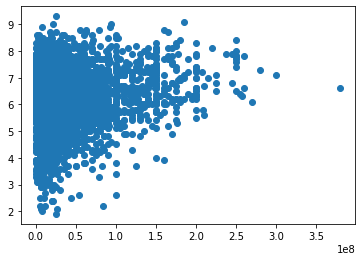

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(non_null_budget.iloc[:,7])
y = np.array(non_null_budget.iloc[:,15])

plt.scatter(x, y)
plt.show()

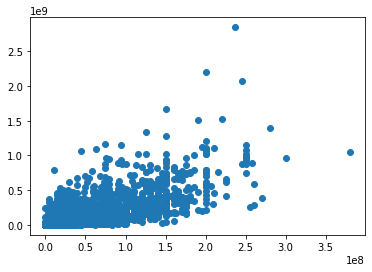

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(non_null_budget.iloc[:,7])
y = np.array(non_null_budget.iloc[:,14])

plt.scatter(x, y)
plt.show()

#### Runtime minutes

In [20]:
non_null_runtimeMinutes = df.loc[df['runtimeMinutes'] != 0]

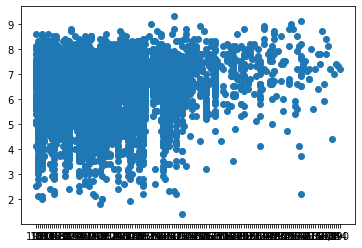

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(non_null_runtimeMinutes.iloc[:,5])
y = np.array(non_null_runtimeMinutes.iloc[:,15])

plt.scatter(x, y)
plt.show()

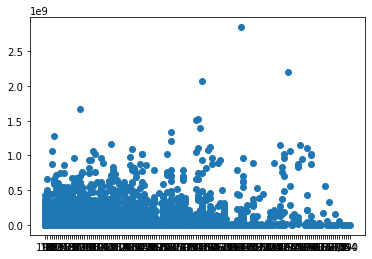

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(non_null_runtimeMinutes.iloc[:,5])
y = np.array(non_null_runtimeMinutes.iloc[:,14])

plt.scatter(x, y)
plt.show()

# Converting categorical columns into multiple columns - Method 1

#### genres

In [196]:
# splitting the columns into multiple
df_genres = df['genres'].str.split('|', expand=True)

In [57]:
# rename the columns cannot work with 0,1,2
df_genres = df_genres.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

In [58]:
# confirm column names changed
df_genres.columns

Index(['g1', 'g2', 'g3'], dtype='object')

In [59]:
# conacatenate uniques from all columns because we want to count unique entries
genres = np.concatenate((np.concatenate((df_genres.g1.unique(), df_genres.g2.unique()),axis = 0), df_genres.g3.unique()),axis = 0)

In [60]:
# create a set, i.e. unique
set_genres = set(genres)

In [61]:
# remove None
# set_genres.remove(None)

In [62]:
# check the set
set_genres

{None,
 'action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western'}

In [63]:
# create columns for every unique entry - method 1

In [64]:
feature_list = list(set_genres)
zero_data = np.zeros(shape=(len(df_genres),len(feature_list)))
df_genres_split = pd.DataFrame(zero_data, columns=feature_list)

In [65]:
for index, row in df_genres.iterrows():
#     df_genres_split[i['g1']] =
    print(row['g1'],row['g2'],row['g3'],index)
    df_genres_split.at[index,row['g1']] = 1
    df_genres_split.at[index,row['g2']] = 1
    df_genres_split.at[index,row['g3']] = 1

comedy fantasy romance 0
comedy None None 1
comedy None None 2
comedy None None 3
horror sci-fi thriller 4
crime drama mystery 5
action comedy None 6
crime drama romance 7
horror None None 8
drama None None 9
action comedy crime 10
drama war None 11
adventure drama romance 12
action adventure comedy 13
adventure animation comedy 14
drama musical None 15
action adventure comedy 16
crime drama None 17
comedy sport None 18
drama None None 19
comedy crime sci-fi 20
biography drama music 21
drama music romance 22
crime drama mystery 23
comedy documentary music 24
action adventure drama 25
crime drama mystery 26
biography drama None 27
action adventure fantasy 28
drama music musical 29
comedy drama romance 30
comedy crime fantasy 31
action adventure sci-fi 32
comedy None None 33
action adventure sci-fi 34
horror thriller None 35
crime thriller None 36
drama None None 37
horror mystery thriller 38
crime drama thriller 39
comedy None None 40
horror thriller None 41
drama None None 42
adventure

action crime sci-fi 544
adventure fantasy None 545
horror thriller None 546
comedy romance None 547
crime drama mystery 548
drama music None 549
comedy fantasy romance 550
action adventure sci-fi 551
romance sci-fi None 552
drama None None 553
documentary music None 554
comedy drama None 555
action crime drama 556
documentary drama None 557
action adventure fantasy 558
drama romance war 559
action comedy drama 560
comedy drama None 561
action sci-fi None 562
comedy music None 563
crime mystery thriller 564
biography documentary history 565
comedy crime music 566
drama None None 567
adventure drama family 568
comedy music romance 569
drama romance None 570
adventure fantasy None 571
comedy None None 572
comedy drama None 573
comedy romance None 574
adventure animation family 575
comedy crime drama 576
drama mystery None 577
drama sport None 578
action adventure romance 579
action crime thriller 580
adventure drama None 581
adventure family sci-fi 582
adventure comedy sci-fi 583
comedy N

action adventure sci-fi 1044
horror thriller None 1045
action comedy None 1046
action comedy western 1047
crime drama thriller 1048
comedy romance None 1049
action adventure sci-fi 1050
crime drama thriller 1051
comedy drama None 1052
comedy fantasy None 1053
comedy drama family 1054
comedy None None 1055
comedy crime thriller 1056
action romance sci-fi 1057
comedy drama None 1058
comedy crime drama 1059
crime drama thriller 1060
crime drama None 1061
action crime drama 1062
drama None None 1063
drama None None 1064
crime drama mystery 1065
adventure drama None 1066
comedy music romance 1067
comedy fantasy horror 1068
comedy drama None 1069
drama romance None 1070
comedy horror None 1071
comedy fantasy romance 1072
drama war None 1073
comedy horror None 1074
action crime drama 1075
drama romance None 1076
crime drama None 1077
action comedy crime 1078
action sci-fi None 1079
comedy drama None 1080
drama None None 1081
drama mystery thriller 1082
crime drama mystery 1083
comedy romance 

comedy drama None 1544
action crime drama 1545
drama horror thriller 1546
drama history None 1547
drama romance None 1548
comedy family romance 1549
action comedy crime 1550
adventure drama thriller 1551
comedy drama mystery 1552
comedy None None 1553
comedy war None 1554
comedy drama romance 1555
action crime drama 1556
comedy fantasy horror 1557
action drama war 1558
comedy drama None 1559
action comedy crime 1560
comedy drama romance 1561
comedy drama romance 1562
comedy crime drama 1563
crime drama thriller 1564
drama None None 1565
drama thriller None 1566
drama music romance 1567
adventure drama history 1568
drama None None 1569
comedy fantasy romance 1570
crime drama thriller 1571
comedy crime None 1572
action crime thriller 1573
adventure drama family 1574
horror None None 1575
action fantasy horror 1576
comedy crime None 1577
adventure animation family 1578
comedy None None 1579
thriller None None 1580
documentary None None 1581
comedy drama None 1582
action horror sci-fi 1583

drama None None 2110
comedy family romance 2111
comedy drama None 2112
drama romance None 2113
biography documentary history 2114
comedy crime drama 2115
comedy None None 2116
crime mystery thriller 2117
drama None None 2118
comedy horror sci-fi 2119
comedy mystery None 2120
comedy drama None 2121
comedy drama None 2122
crime drama thriller 2123
action comedy fantasy 2124
crime drama None 2125
comedy crime drama 2126
drama thriller None 2127
drama romance None 2128
action comedy family 2129
comedy romance None 2130
comedy drama None 2131
comedy drama romance 2132
drama None None 2133
comedy fantasy horror 2134
drama None None 2135
comedy romance None 2136
comedy drama None 2137
action comedy crime 2138
crime drama fantasy 2139
comedy romance None 2140
animation family fantasy 2141
action drama romance 2142
family fantasy music 2143
adventure animation drama 2144
action drama None 2145
biography drama fantasy 2146
comedy drama thriller 2147
crime drama mystery 2148
crime drama thriller 

action crime sci-fi 2668
comedy drama romance 2669
drama romance None 2670
action drama war 2671
action adventure sci-fi 2672
comedy drama None 2673
drama romance None 2674
comedy drama romance 2675
drama thriller None 2676
action biography western 2677
crime drama None 2678
adventure comedy crime 2679
comedy crime thriller 2680
adventure drama family 2681
adventure family None 2682
crime drama thriller 2683
adventure animation family 2684
drama None None 2685
action comedy None 2686
mystery sci-fi thriller 2687
comedy None None 2688
comedy drama romance 2689
horror thriller None 2690
action sci-fi None 2691
biography drama None 2692
comedy drama romance 2693
comedy drama romance 2694
adventure animation comedy 2695
drama romance None 2696
crime drama mystery 2697
comedy thriller None 2698
drama romance None 2699
comedy None None 2700
comedy None None 2701
comedy None None 2702
crime drama thriller 2703
comedy family fantasy 2704
comedy crime drama 2705
crime thriller None 2706
comedy 

crime drama thriller 3230
drama None None 3231
comedy None None 3232
action horror sci-fi 3233
action drama sci-fi 3234
documentary history None 3235
adventure family sci-fi 3236
action adventure fantasy 3237
drama romance None 3238
comedy crime drama 3239
comedy sport None 3240
drama war None 3241
adventure comedy fantasy 3242
comedy drama family 3243
action adventure comedy 3244
biography drama romance 3245
drama romance None 3246
drama None None 3247
fantasy horror None 3248
comedy romance None 3249
comedy drama None 3250
adventure comedy family 3251
drama music romance 3252
drama music None 3253
adventure drama thriller 3254
drama None None 3255
adventure animation comedy 3256
action adventure sci-fi 3257
crime drama romance 3258
adventure comedy drama 3259
comedy romance None 3260
adventure comedy drama 3261
comedy drama fantasy 3262
drama history horror 3263
action comedy crime 3264
action crime drama 3265
action horror sci-fi 3266
drama romance None 3267
action adventure fantasy

action thriller None 3793
action crime drama 3794
action comedy sci-fi 3795
biography drama None 3796
drama None None 3797
comedy romance None 3798
comedy fantasy None 3799
comedy drama sport 3800
drama history romance 3801
comedy drama romance 3802
comedy sci-fi None 3803
comedy documentary None 3804
action comedy crime 3805
comedy None None 3806
drama None None 3807
comedy drama None 3808
action crime mystery 3809
action adventure animation 3810
documentary war None 3811
biography documentary history 3812
action comedy fantasy 3813
action sci-fi None 3814
crime drama thriller 3815
adventure comedy drama 3816
crime drama thriller 3817
crime drama music 3818
comedy musical romance 3819
biography documentary None 3820
drama None None 3821
comedy drama sci-fi 3822
comedy romance None 3823
comedy None None 3824
adventure sci-fi thriller 3825
crime thriller None 3826
biography drama None 3827
action adventure romance 3828
documentary None None 3829
drama None None 3830
drama romance thrill

comedy music romance 4418
documentary sport None 4419
documentary None None 4420
drama mystery thriller 4421
action drama music 4422
drama None None 4423
adventure animation comedy 4424
action comedy crime 4425
comedy family music 4426
comedy drama romance 4427
comedy drama romance 4428
action horror mystery 4429
adventure western None 4430
drama None None 4431
action adventure fantasy 4432
comedy None None 4433
action drama history 4434
drama None None 4435
drama sport None 4436
animation comedy sci-fi 4437
action adventure biography 4438
action comedy crime 4439
crime drama thriller 4440
comedy fantasy None 4441
comedy drama romance 4442
drama mystery thriller 4443
comedy None None 4444
drama mystery thriller 4445
comedy romance None 4446
comedy drama None 4447
biography drama history 4448
drama romance None 4449
comedy family romance 4450
crime drama thriller 4451
action comedy None 4452
drama mystery thriller 4453
drama None None 4454
comedy None None 4455
comedy drama None 4456
ad

action adventure sci-fi 5038
comedy None None 5039
drama romance thriller 5040
drama None None 5041
comedy drama None 5042
horror mystery thriller 5043
drama None None 5044
comedy drama None 5045
comedy romance None 5046
comedy family None 5047
drama romance None 5048
comedy drama None 5049
crime drama mystery 5050
action adventure drama 5051
action drama thriller 5052
biography drama history 5053
crime thriller None 5054
comedy drama romance 5055
adventure animation comedy 5056
horror thriller None 5057
biography drama music 5058
drama family romance 5059
adventure animation comedy 5060
action comedy crime 5061
action crime None 5062
biography drama history 5063
biography drama music 5064
biography comedy drama 5065
drama history sport 5066
documentary None None 5067
action crime drama 5068
action adventure comedy 5069
comedy drama mystery 5070
biography drama sport 5071
horror thriller None 5072
comedy None None 5073
horror thriller None 5074
drama history romance 5075
drama None Non

biography documentary music 5543
horror sci-fi thriller 5544
comedy crime drama 5545
adventure comedy drama 5546
adventure horror sci-fi 5547
action crime drama 5548
action drama romance 5549
comedy drama None 5550
drama music None 5551
comedy drama music 5552
comedy drama romance 5553
action crime drama 5554
comedy drama romance 5555
action adventure animation 5556
documentary None None 5557
comedy drama None 5558
drama horror thriller 5559
crime drama None 5560
drama romance None 5561
comedy drama romance 5562
action crime drama 5563
biography drama None 5564
comedy crime None 5565
drama sport None 5566
comedy None None 5567
animation crime drama 5568
action comedy family 5569
comedy drama mystery 5570
comedy romance None 5571
documentary history sport 5572
adventure animation comedy 5573
comedy drama None 5574
drama thriller None 5575
crime drama mystery 5576
horror thriller None 5577
drama None None 5578
biography drama None 5579
crime drama romance 5580
action adventure comedy 558

biography drama history 6071
comedy drama romance 6072
horror mystery thriller 6073
adventure comedy drama 6074
comedy drama romance 6075
adventure drama romance 6076
horror thriller None 6077
action crime thriller 6078
documentary None None 6079
biography drama history 6080
comedy drama music 6081
crime thriller None 6082
comedy romance None 6083
action crime drama 6084
drama None None 6085
comedy drama romance 6086
comedy None None 6087
horror sci-fi thriller 6088
drama sci-fi thriller 6089
drama None None 6090
drama romance None 6091
action drama family 6092
action adventure comedy 6093
documentary None None 6094
comedy family fantasy 6095
crime mystery thriller 6096
action crime None 6097
action adventure family 6098
documentary None None 6099
comedy family sport 6100
comedy crime fantasy 6101
drama western None 6102
comedy drama horror 6103
comedy romance None 6104
action adventure sci-fi 6105
comedy drama None 6106
comedy romance None 6107
drama sci-fi thriller 6108
comedy drama 

comedy drama mystery 6667
drama fantasy sport 6668
comedy drama romance 6669
horror mystery thriller 6670
comedy None None 6671
comedy drama romance 6672
action adventure drama 6673
comedy None None 6674
drama None None 6675
action mystery thriller 6676
comedy fantasy None 6677
drama None None 6678
comedy romance None 6679
fantasy horror thriller 6680
crime drama thriller 6681
comedy drama None 6682
drama horror thriller 6683
comedy drama romance 6684
drama None None 6685
drama romance None 6686
comedy family fantasy 6687
comedy drama None 6688
comedy romance None 6689
comedy crime sci-fi 6690
biography drama romance 6691
biography drama romance 6692
horror thriller None 6693
comedy None None 6694
comedy drama romance 6695
drama None None 6696
comedy crime drama 6697
documentary None None 6698
drama fantasy mystery 6699
action adventure comedy 6700
comedy romance None 6701
drama None None 6702
comedy None None 6703
comedy romance sport 6704
comedy romance None 6705
action adventure fan

comedy romance None 7222
drama None None 7223
biography documentary sport 7224
drama None None 7225
biography documentary history 7226
comedy drama None 7227
action sci-fi thriller 7228
comedy None None 7229
drama thriller None 7230
action drama history 7231
drama horror mystery 7232
comedy drama None 7233
action adventure comedy 7234
crime mystery thriller 7235
action adventure drama 7236
comedy documentary None 7237
adventure comedy crime 7238
drama None None 7239
adventure drama family 7240
drama None None 7241
action adventure drama 7242
drama romance None 7243
action sci-fi thriller 7244
action fantasy horror 7245
crime drama thriller 7246
action comedy romance 7247
comedy crime horror 7248
documentary None None 7249
action family fantasy 7250
comedy drama romance 7251
drama war None 7252
comedy drama music 7253
action crime mystery 7254
biography drama music 7255
action sport thriller 7256
action adventure fantasy 7257
romance thriller None 7258
drama None None 7259
drama None No

action comedy crime 7792
drama romance None 7793
horror sci-fi None 7794
action crime drama 7795
drama mystery romance 7796
adventure animation comedy 7797
action crime thriller 7798
biography documentary music 7799
comedy crime mystery 7800
drama thriller None 7801
documentary war None 7802
adventure comedy fantasy 7803
drama romance None 7804
documentary None None 7805
documentary music None 7806
horror thriller None 7807
comedy romance None 7808
horror thriller None 7809
comedy family None 7810
action drama history 7811
drama mystery thriller 7812
drama None None 7813
comedy drama fantasy 7814
action drama romance 7815
drama thriller None 7816
action thriller None 7817
comedy drama romance 7818
comedy drama horror 7819
drama horror thriller 7820
drama None None 7821
biography crime drama 7822
comedy None None 7823
action comedy crime 7824
romance None None 7825
comedy romance None 7826
drama history romance 7827
comedy drama None 7828
comedy drama None 7829
action drama romance 7830

horror None None 8317
drama fantasy None 8318
drama family fantasy 8319
comedy None None 8320
drama None None 8321
action comedy None 8322
adventure drama romance 8323
comedy None None 8324
comedy drama romance 8325
comedy drama None 8326
crime horror mystery 8327
documentary drama music 8328
comedy None None 8329
biography comedy drama 8330
comedy romance None 8331
action adventure comedy 8332
drama None None 8333
comedy drama None 8334
horror mystery thriller 8335
action drama thriller 8336
crime drama fantasy 8337
comedy horror None 8338
comedy drama romance 8339
adventure animation comedy 8340
biography drama None 8341
documentary family None 8342
action adventure sci-fi 8343
comedy romance None 8344
comedy drama None 8345
documentary sport None 8346
drama None None 8347
comedy romance None 8348
documentary None None 8349
crime drama thriller 8350
drama war None 8351
crime drama history 8352
fantasy horror mystery 8353
comedy drama romance 8354
crime mystery thriller 8355
action dr

action thriller None 8792
adventure animation comedy 8793
drama romance thriller 8794
biography crime drama 8795
drama thriller None 8796
documentary None None 8797
horror thriller None 8798
biography documentary None 8799
drama None None 8800
documentary None None 8801
action crime thriller 8802
action adventure fantasy 8803
drama mystery thriller 8804
action comedy family 8805
horror None None 8806
action None None 8807
drama thriller None 8808
action comedy drama 8809
documentary drama None 8810
drama mystery thriller 8811
comedy drama None 8812
horror thriller None 8813
comedy drama None 8814
comedy drama None 8815
adventure animation comedy 8816
family None None 8817
adventure animation comedy 8818
drama None None 8819
comedy drama None 8820
documentary family None 8821
documentary None None 8822
comedy drama None 8823
drama thriller None 8824
comedy romance None 8825
comedy drama None 8826
documentary None None 8827
documentary sport None 8828
comedy drama family 8829
comedy None

drama mystery sci-fi 9292
comedy romance None 9293
horror sci-fi thriller 9294
action adventure animation 9295
adventure animation comedy 9296
drama None None 9297
action drama history 9298
horror sci-fi None 9299
horror thriller None 9300
horror None None 9301
crime drama horror 9302
adventure comedy horror 9303
drama None None 9304
thriller None None 9305
drama None None 9306
comedy crime drama 9307
documentary None None 9308
biography comedy drama 9309
horror mystery thriller 9310
action crime drama 9311
documentary None None 9312
thriller None None 9313
comedy drama None 9314
comedy drama None 9315
crime drama thriller 9316
comedy None None 9317
comedy documentary None 9318
drama romance None 9319
action crime thriller 9320
drama None None 9321
comedy None None 9322
horror thriller None 9323
biography comedy crime 9324
crime thriller None 9325
comedy horror None 9326
biography drama history 9327
comedy None None 9328
documentary None None 9329
biography documentary music 9330
thril

comedy drama None 9792
adventure biography documentary 9793
documentary None None 9794
crime thriller None 9795
drama horror thriller 9796
comedy drama None 9797
documentary None None 9798
documentary None None 9799
drama fantasy mystery 9800
action crime drama 9801
action adventure sci-fi 9802
drama None None 9803
action crime thriller 9804
biography documentary music 9805
drama None None 9806
drama None None 9807
biography documentary None 9808
drama history horror 9809
documentary sport None 9810
crime drama thriller 9811
crime drama fantasy 9812
comedy documentary reality-tv 9813
comedy None None 9814
drama None None 9815
action adventure thriller 9816
crime documentary history 9817
comedy drama romance 9818
drama romance None 9819
action adventure comedy 9820
action adventure thriller 9821
documentary None None 9822
comedy crime drama 9823
action adventure drama 9824
biography documentary None 9825
crime drama None 9826
comedy None None 9827
horror thriller None 9828
drama None No

drama None None 10398
documentary history None 10399
crime drama mystery 10400
action drama thriller 10401
biography drama sport 10402
horror mystery thriller 10403
biography crime documentary 10404
drama family None 10405
crime horror thriller 10406
adventure comedy family 10407
documentary history None 10408
comedy drama romance 10409
adventure animation comedy 10410
comedy horror romance 10411
drama None None 10412
drama romance thriller 10413
drama None None 10414
horror mystery thriller 10415
documentary None None 10416
comedy drama None 10417
comedy None None 10418
adventure drama family 10419
action adventure comedy 10420
horror thriller None 10421
action adventure sci-fi 10422
horror mystery thriller 10423
horror mystery thriller 10424
adventure drama family 10425
horror romance sci-fi 10426
horror None None 10427
action crime drama 10428
horror sci-fi None 10429
action adventure None 10430
documentary None None 10431
adventure family None 10432
action adventure mystery 10433
a

In [66]:
df_genres_split

,thriller,family,drama,sci-fi,adventure,western,war,reality-tv,musical,animation,...,action,romance,fantasy,comedy,history,crime,news,sport,music,horror
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
10854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10855,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
# create multiple columns - method 2

In [48]:
list_genres = list(set_genres)

In [68]:
len(list_genres)

24

In [74]:
df_genres_modified = pd.DataFrame(np.zeros(shape=(len(df),len(df_genres.columns))))

In [75]:
for index, row in df_genres.iterrows():
    df_genres_modified.at[index,0] = list_genres.index(row['g1'])
    df_genres_modified.at[index,1] = list_genres.index(row['g2'])
    df_genres_modified.at[index,2] = list_genres.index(row['g3'])

In [76]:
df_genres_modified = df_genres_modified.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

In [77]:
df_genres_modified.head()

,g1,g2,g3
0,17.0,16.0,15.0
1,17.0,12.0,12.0
2,17.0,12.0,12.0
3,17.0,12.0,12.0
4,23.0,3.0,0.0


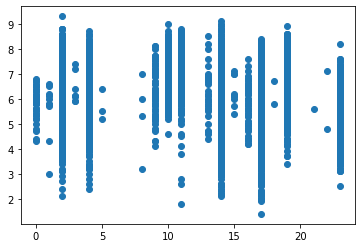

In [80]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_genres_modified.iloc[:,0])
y = np.array(df.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [412]:
# train , test, val

df_genres_train = df_train_data['genres'].str.split('|', expand=True)
df_genres_val = df_val_data['genres'].str.split('|', expand=True)
df_genres_test = df_test_data['genres'].str.split('|', expand=True)

# reanem columns
df_genres_train = df_genres_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_val = df_genres_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_test = df_genres_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
genres_train = np.concatenate((np.concatenate((df_genres_train.g1.unique(), df_genres_train.g2.unique()),axis = 0)
                         , df_genres_train.g3.unique()),axis = 0)
genres_val = np.concatenate((np.concatenate((df_genres_val.g1.unique(), df_genres_val.g2.unique()),axis = 0)
                         , df_genres_val.g3.unique()),axis = 0)

set_genres_train = set(genres_train)
set_genres_val= set(genres_val)
set_genres_train_val = set_genres_train.union(set_genres_val)

list_genres = list(set_genres_train_val)

df_genres_modified_train = pd.DataFrame(np.zeros(shape=(len(df_genres_train),len(df_genres_train.columns))))
df_genres_modified_val = pd.DataFrame(np.zeros(shape=(len(df_genres_val),len(df_genres_val.columns))))
df_genres_modified_test = pd.DataFrame(np.zeros(shape=(len(df_genres_test),len(df_genres_test.columns))))

k = 0
for index, row in df_genres_train.iterrows():
    df_genres_modified_train.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_train.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_train.at[k,2] = list_genres.index(row['g3'])
    k = k+1

k = 0
for index,row in df_genres_val.iterrows():
    df_genres_modified_val.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_val.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_val.at[k,2] = list_genres.index(row['g3'])
    k = k+1
    
k = 0
for index,row in df_genres_test.iterrows():
    df_genres_modified_test.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_test.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_test.at[k,2] = list_genres.index(row['g3'])
    k = k+1

df_genres_modified_train = df_genres_modified_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_val = df_genres_modified_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_test = df_genres_modified_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

#### director

In [81]:
df_director = df['director'].str.split('|', expand=True)

In [82]:
df_director = df_director.rename(columns={0: 'd1', 1: 'd2', 2: 'd3'})

In [83]:
df_director.columns

Index(['d1', 'd2', 'd3'], dtype='object')

In [84]:
director = np.concatenate((np.concatenate((df_director.d1.unique(), df_director.d2.unique()),axis = 0), df_director.d3.unique()),axis = 0)

In [85]:
set_director = set(director)

In [86]:
set_director

{nan,
 'stewart raffill',
 'celine danhier',
 'zack snyder',
 'michael greenspan',
 'charles barker',
 'sanaa hamri',
 'robert vince',
 'rick jacobson',
 'walter bernstein',
 'aaron blaise',
 'walter salles',
 'mel brooks',
 'curtis hanson',
 'antony hoffman',
 'peter kosminsky',
 'fran rubel kuzui',
 'phil alden robinson',
 'adam sherman',
 'mandie fletcher',
 'nicholas d. wrathall',
 'bob smeaton',
 'colin brady',
 'julian barratt',
 'tom ford',
 'james watkins',
 'vadim perelman',
 'raj nidimoru',
 'john frankenheimer',
 'roland joffé',
 'david beilinson',
 'elliott hong',
 'stig svendsen',
 'josh boone',
 'jeremy leven',
 'josh appignanesi',
 'sebastian gutierrez',
 'doug pray',
 'daniel minahan',
 'kathryn bigelow',
 'anthony russo',
 'barry jenkins',
 'richard brandes',
 'sylvester stallone',
 'joseph ruben',
 'bryan woods',
 'murat saraçoglu',
 'julia bacha',
 'regan hall',
 'storm saulter',
 'andrew lau',
 'sudhir mishra',
 'michael zimbalist',
 'greta schiller',
 'claude lelou

In [87]:
feature_list = list(set_director)

In [88]:
zero_data_modified = pd.DataFrame(np.zeros(shape=(len(df_director),len(df_director.columns))))

In [89]:
for index, row in df_director.iterrows():
    zero_data_modified.at[index,0] = feature_list.index(row['d1'])
    zero_data_modified.at[index,1] = feature_list.index(row['d2'])
    zero_data_modified.at[index,2] = feature_list.index(row['d3'])

In [90]:
df_director_columnized = zero_data_modified

In [92]:
df_director_columnized = df_director_columnized.rename(columns={0: 'd1', 1: 'd2', 2: 'd3'})

In [93]:
df_director_columnized.head()

,d1,d2,d3
0,636.0,3690.0,3690.0
1,3277.0,3690.0,3690.0
2,3002.0,3690.0,3690.0
3,2895.0,1377.0,4087.0
4,1294.0,3690.0,3690.0


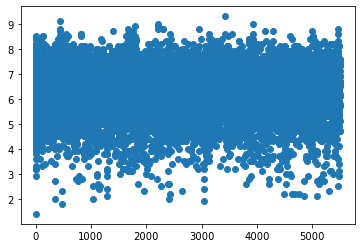

In [94]:
# test the realtion between columns and rating, here we cannot find much relation
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_director_columnized.iloc[:,0])
y = np.array(df.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [414]:
# train , test, val

df_director_train = df_train_data['director'].str.split('|', expand=True)
df_director_val = df_val_data['director'].str.split('|', expand=True)
df_director_test = df_test_data['director'].str.split('|', expand=True)

# reanem columns
df_director_train = df_director_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_val = df_director_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_test = df_director_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
director_train = np.concatenate((np.concatenate((np.concatenate((df_director_train.g1.unique(),
                                                 df_director_train.g2.unique()),axis = 0)
                         , df_director_train.g3.unique()),axis = 0), df_director_train.g4.unique()),axis = 0)
director_val = np.concatenate((np.concatenate((np.concatenate((df_director_val.g1.unique(),
                                                               df_director_val.g2.unique()),axis = 0)
                         , df_director_val.g3.unique()),axis = 0), df_director_val.g4.unique()),axis = 0)

set_director_train = set(director_train)
set_director_val= set(director_val)
set_director_train_val = set_director_train.union(set_director_val)

list_director = list(set_director_train_val)

df_director_modified_train = pd.DataFrame(np.zeros(shape=(len(df_director_train),len(df_director_train.columns))))
df_director_modified_val = pd.DataFrame(np.zeros(shape=(len(df_director_val),len(df_director_val.columns))))
df_director_modified_test = pd.DataFrame(np.zeros(shape=(len(df_director_test),len(df_director_test.columns))))


k = 0
for index, row in df_director_train.iterrows():
    cindex = 0
    for c in df_director_train.columns:
        df_director_modified_train.at[k,cindex] = list_director.index(row[c])
    k = k+1

k = 0
for index,row in df_director_val.iterrows():
    cindex = 0
    for c in df_director_val.columns:
        df_director_modified_val.at[k,cindex] = list_director.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_cast)
for index,row in df_director_test.iterrows():
    cindex = 0
    for c in df_director_test.columns:
        df_director_modified_test.at[k,cindex] = list_director.index(row[c]) if row[c] in list_director else missing_index
    k = k+1

# k = 0
# for index, row in df_director_train.iterrows():
#     df_director_modified_train.at[k,0] = list_director.index(row['g1'])
#     df_director_modified_train.at[k,1] = list_director.index(row['g2'])
#     df_director_modified_train.at[k,2] = list_director.index(row['g3'])
#     df_director_modified_train.at[k,3] = list_director.index(row['g4'])
#     k = k+1

# k = 0
# for index,row in df_director_val.iterrows():
#     df_director_modified_val.at[k,0] = list_director.index(row['g1'])
#     df_director_modified_val.at[k,1] = list_director.index(row['g2'])
#     df_director_modified_val.at[k,2] = list_director.index(row['g3'])
#     df_director_modified_val.at[k,3] = list_director.index(row['g4'])
#     k = k+1
    
# k = 0
# missing_index = len(list_director)
# for index,row in df_director_test.iterrows():
#     df_director_modified_test.at[k,0] = list_director.index(row['g1']) if row['g1'] in list_director else missing_index
#     df_director_modified_test.at[k,1] = list_director.index(row['g2']) if row['g2'] in list_director else missing_index
#     df_director_modified_test.at[k,2] = list_director.index(row['g3']) if row['g3'] in list_director else missing_index
#     df_director_modified_test.at[k,3] = list_director.index(row['g4']) if row['g4'] in list_director else missing_index
#     k = k+1

df_director_modified_train = df_director_modified_train.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_val = df_director_modified_val.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_test = df_director_modified_test.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})

#### production companies

In [106]:
df_prod_companies = df['production_companies'].str.split('|', expand=True)

In [107]:
df_prod_companies = df_prod_companies.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})

In [108]:
df_prod_companies.head()

,pc1,pc2,pc3,pc4
0,konrad pictures,miramax films,None,None
1,slc,None,None,None
2,ipc films,twentieth century fox film corporation,None,None
3,paramount pictures,None,None,None
4,warner bros.,None,None,None


In [109]:
prod_companies = np.concatenate((np.concatenate((np.concatenate((df_prod_companies.pc1.unique(), df_prod_companies.pc2.unique()),axis = 0), df_prod_companies.pc3.unique()),axis = 0), df_prod_companies.pc4.unique()),axis = 0)

In [110]:
set_prod_companies = set(prod_companies)

In [111]:
list_prod_companies = list(set_prod_companies)

In [112]:
len(list_prod_companies)

7226

In [113]:
df_prod_companies_modified = pd.DataFrame(np.zeros(shape=(len(df),len(df_prod_companies.columns))))

In [114]:
for index, row in df_prod_companies.iterrows():
    df_prod_companies_modified.at[index,0] = list_prod_companies.index(row['pc1'])
    df_prod_companies_modified.at[index,1] = list_prod_companies.index(row['pc2'])
    df_prod_companies_modified.at[index,2] = list_prod_companies.index(row['pc3'])
    df_prod_companies_modified.at[index,3] = list_prod_companies.index(row['pc4'])

In [115]:
df_prod_companies_modified

,0,1,2,3
0,5867.0,3002.0,4746.0,4746.0
1,5193.0,4746.0,4746.0,4746.0
2,1661.0,6.0,4746.0,4746.0
3,6679.0,4746.0,4746.0,4746.0
4,4767.0,4746.0,4746.0,4746.0
...,...,...,...,...
10853,6914.0,4992.0,4746.0,4746.0
10854,4992.0,4746.0,4746.0,4746.0
10855,0.0,0.0,0.0,0.0
10856,4992.0,4746.0,4746.0,4746.0


In [117]:
df_prod_companies_modified = df_prod_companies_modified.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})

In [118]:
df_prod_companies_modified.head()

,pc1,pc2,pc3,pc4
0,5867.0,3002.0,4746.0,4746.0
1,5193.0,4746.0,4746.0,4746.0
2,1661.0,6.0,4746.0,4746.0
3,6679.0,4746.0,4746.0,4746.0
4,4767.0,4746.0,4746.0,4746.0


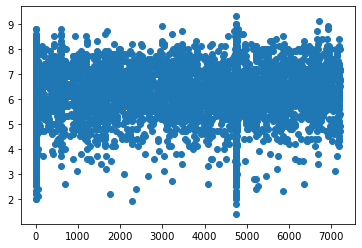

In [119]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_prod_companies_modified.iloc[:,2])
y = np.array(df.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [295]:
df_train_data.columns

Index(['imdb_id', 'runtimeMinutes', 'genres', 'cast', 'averageRating',
       'numVotes', 'title', 'original_title', 'overview', 'release_date',
       'poster_link', 'revenue_worldwide_BOM', 'director', 'countries',
       'country codes', 'language codes', 'languages', 'Budget', 'cover url',
       'production companies'],
      dtype='object')

In [415]:
# train , test, val

df_pc_train = df_train_data['production companies'].str.split('|', expand=True)
df_pc_val = df_val_data['production companies'].str.split('|', expand=True)
df_pc_test = df_test_data['production companies'].str.split('|', expand=True)

# reanem columns
df_pc_train = df_pc_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_val = df_pc_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_test = df_pc_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
pc_train = np.concatenate((np.concatenate((np.concatenate((df_pc_train.g1.unique(),
                                                 df_pc_train.g2.unique()),axis = 0)
                         , df_pc_train.g3.unique()),axis = 0), df_pc_train.g4.unique()),axis = 0)
pc_val = np.concatenate((np.concatenate((np.concatenate((df_pc_val.g1.unique(),
                                                               df_pc_val.g2.unique()),axis = 0)
                         , df_pc_val.g3.unique()),axis = 0), df_pc_val.g4.unique()),axis = 0)

set_pc_train = set(pc_train)
set_pc_val= set(pc_val)
set_pc_train_val = set_pc_train.union(set_pc_val)

list_pc = list(set_pc_train_val)

df_pc_modified_train = pd.DataFrame(np.zeros(shape=(len(df_pc_train),len(df_pc_train.columns))))
df_pc_modified_val = pd.DataFrame(np.zeros(shape=(len(df_pc_val),len(df_pc_val.columns))))
df_pc_modified_test = pd.DataFrame(np.zeros(shape=(len(df_pc_test),len(df_pc_test.columns))))


k = 0
for index, row in df_pc_train.iterrows():
    cindex = 0
    for c in df_pc_train.columns:
        df_pc_modified_train.at[k,cindex] = list_pc.index(row[c])
    k = k+1

k = 0
for index,row in df_pc_val.iterrows():
    cindex = 0
    for c in df_pc_val.columns:
        df_pc_modified_val.at[k,cindex] = list_pc.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_pc)
for index,row in df_pc_test.iterrows():
    cindex = 0
    for c in df_pc_test.columns:
        df_pc_modified_test.at[k,cindex] = list_pc.index(row[c]) if row[c] in list_pc else missing_index
    k = k+1

# k = 0
# for index, row in df_pc_train.iterrows():
#     df_pc_modified_train.at[k,0] = list_pc.index(row['g1'])
#     df_pc_modified_train.at[k,1] = list_pc.index(row['g2'])
#     df_pc_modified_train.at[k,2] = list_pc.index(row['g3'])
#     df_pc_modified_train.at[k,3] = list_pc.index(row['g4'])
#     k = k+1

# k = 0
# for index,row in df_pc_val.iterrows():
#     df_pc_modified_val.at[k,0] = list_pc.index(row['g1'])
#     df_pc_modified_val.at[k,1] = list_pc.index(row['g2'])
#     df_pc_modified_val.at[k,2] = list_pc.index(row['g3'])
#     df_pc_modified_val.at[k,3] = list_pc.index(row['g4'])
#     k = k+1
    
# k = 0
# missing_index = len(list_pc)
# for index,row in df_pc_test.iterrows():
# #     df_pc_modified_test.at[k,0] = list_pc.index(row['g1']) if row['g1'] in list_pc else missing_index
# #     df_pc_modified_test.at[k,1] = list_pc.index(row['g2']) if row['g2'] in list_pc else missing_index
# #     df_pc_modified_test.at[k,2] = list_pc.index(row['g3']) if row['g3'] in list_pc else missing_index
# #     df_pc_modified_test.at[k,3] = list_pc.index(row['g4']) if row['g4'] in list_pc else missing_index
#     cindex = 0
#     for c in df_pc_test.columns:
#         df_pc_modified_test.at[k,cindex] = list_pc.index(row[c]) if row[c] in list_pc else missing_index
#     k = k+1

df_pc_modified_train = df_pc_modified_train.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_val = df_pc_modified_val.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_test = df_pc_modified_test.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})

In [316]:
for index,row in df_pc_test.iterrows():
    cindex = 0
    for c in df_pc_test.columns:
        df_pc_modified_test.at[k,cindex] = list_pc.index(row[c]) if row[c] in list_pc else missing_index
        cindex = cindex + 1

In [318]:
df_pc_modified_test.shape

(1752, 4)

#### cast

In [120]:
df_cast = df['cast'].str.split('|', expand=True)

In [122]:
df_cast = df_cast.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})

In [123]:
cast = np.concatenate((np.concatenate((df_cast.c1.unique(), df_cast.c2.unique()),axis = 0), df_cast.c3.unique()),axis = 0)

In [124]:
set_cast = set(cast)

In [125]:
list_cast = list(set_cast)

In [126]:
len(list_cast)

12643

In [127]:
df_cast_modified = pd.DataFrame(np.zeros(shape=(len(df),len(df_cast.columns))))

In [128]:
for index, row in df_cast.iterrows():
    df_cast_modified.at[index,0] = list_cast.index(row['c1'])
    df_cast_modified.at[index,1] = list_cast.index(row['c2'])
    df_cast_modified.at[index,2] = list_cast.index(row['c3'])

In [131]:
df_cast_modified = df_cast_modified.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})

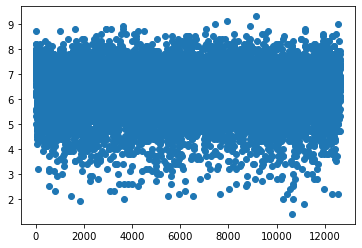

In [132]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_cast_modified.iloc[:,1])
y = np.array(df.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [319]:
df_train_data.columns

Index(['imdb_id', 'runtimeMinutes', 'genres', 'cast', 'averageRating',
       'numVotes', 'title', 'original_title', 'overview', 'release_date',
       'poster_link', 'revenue_worldwide_BOM', 'director', 'countries',
       'country codes', 'language codes', 'languages', 'Budget', 'cover url',
       'production companies'],
      dtype='object')

In [416]:
# train , test, val

df_cast_train = df_train_data['cast'].str.split('|', expand=True)
df_cast_val = df_val_data['cast'].str.split('|', expand=True)
df_cast_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_cast_train = df_cast_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_val = df_cast_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_test = df_cast_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
cast_train = np.concatenate((np.concatenate((df_cast_train.g1.unique(),
                                                 df_cast_train.g2.unique()),axis = 0)
                         , df_cast_train.g3.unique()),axis = 0)
cast_val = np.concatenate((np.concatenate((df_cast_val.g1.unique(),
                                                               df_cast_val.g2.unique()),axis = 0)
                         , df_cast_val.g3.unique()),axis = 0)

set_cast_train = set(cast_train)
set_cast_val= set(cast_val)
set_cast_train_val = set_cast_train.union(set_cast_val)

list_cast = list(set_cast_train_val)

df_cast_modified_train = pd.DataFrame(np.zeros(shape=(len(df_cast_train),len(df_cast_train.columns))))
df_cast_modified_val = pd.DataFrame(np.zeros(shape=(len(df_cast_val),len(df_cast_val.columns))))
df_cast_modified_test = pd.DataFrame(np.zeros(shape=(len(df_cast_test),len(df_cast_test.columns))))

k = 0
for index, row in df_cast_train.iterrows():
    cindex = 0
    for c in df_cast_train.columns:
        df_cast_modified_train.at[k,cindex] = list_cast.index(row[c])
    k = k+1

k = 0
for index,row in df_cast_val.iterrows():
    cindex = 0
    for c in df_cast_val.columns:
        df_cast_modified_val.at[k,cindex] = list_cast.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_cast)
for index,row in df_cast_test.iterrows():
    cindex = 0
    for c in df_cast_test.columns:
        df_cast_modified_test.at[k,cindex] = list_cast.index(row[c]) if row[c] in list_cast else missing_index
    k = k+1

df_cast_modified_train = df_cast_modified_train.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_val = df_cast_modified_val.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_test = df_cast_modified_test.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})

In [336]:
df_cast_modified_train.shape

(8177, 3)

#### languages

In [133]:
df_languages = df['languages'].str.split('|', expand=True)

In [134]:
df_languages.head()

,0,1,2,3,4
0,en,fr,None,None,None
1,en,None,None,None,None
2,en,fr,None,None,None
3,en,None,None,None,None
4,en,es,None,None,None


In [135]:
df_languages = df_languages.rename(columns={0: 'l1', 1: 'l2', 2: 'l3', 3: 'l4', 4: 'l5'})

In [136]:
languages = np.concatenate((
    np.concatenate((
        np.concatenate((
            np.concatenate((
                df_languages.l1.unique(),
                df_languages.l2.unique()),axis = 0),
            df_languages.l3.unique()),axis = 0),
        df_languages.l4.unique()),axis = 0), 
    df_languages.l5.unique()),axis = 0)

In [137]:
set_languages = set(languages)

In [138]:
list_languages = list(set_languages)

In [139]:
len(list_languages)

102

In [140]:
df_languages_modified = pd.DataFrame(np.zeros(shape=(len(df),len(df_languages.columns))))

In [141]:
for index, row in df_languages.iterrows():
    df_languages_modified.at[index,0] = list_languages.index(row['l1'])
    df_languages_modified.at[index,1] = list_languages.index(row['l2'])
    df_languages_modified.at[index,2] = list_languages.index(row['l3'])
    df_languages_modified.at[index,3] = list_languages.index(row['l4'])
    df_languages_modified.at[index,4] = list_languages.index(row['l5'])

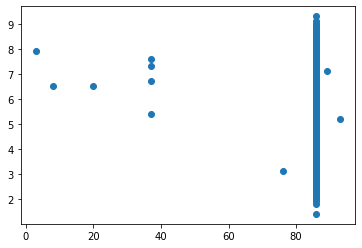

In [142]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_languages_modified.iloc[:,4])
y = np.array(df.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [417]:
# train , test, val

df_lang_train = df_train_data['cast'].str.split('|', expand=True)
df_lang_val = df_val_data['cast'].str.split('|', expand=True)
df_lang_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_lang_train = df_lang_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_val = df_lang_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_test = df_lang_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
lang_train = np.concatenate((np.concatenate((df_lang_train.g1.unique(),
                                                 df_lang_train.g2.unique()),axis = 0)
                         , df_lang_train.g3.unique()),axis = 0)
lang_val = np.concatenate((np.concatenate((df_lang_val.g1.unique(),
                                                               df_lang_val.g2.unique()),axis = 0)
                         , df_lang_val.g3.unique()),axis = 0)

set_lang_train = set(lang_train)
set_lang_val= set(lang_val)
set_lang_train_val = set_lang_train.union(set_lang_val)

list_lang = list(set_lang_train_val)

df_lang_modified_train = pd.DataFrame(np.zeros(shape=(len(df_lang_train),len(df_lang_train.columns))))
df_lang_modified_val = pd.DataFrame(np.zeros(shape=(len(df_lang_val),len(df_lang_val.columns))))
df_lang_modified_test = pd.DataFrame(np.zeros(shape=(len(df_lang_test),len(df_lang_test.columns))))

k = 0
for index, row in df_lang_train.iterrows():
    cindex = 0
    for c in df_lang_train.columns:
        df_lang_modified_train.at[k,cindex] = list_lang.index(row[c])
    k = k+1

k = 0
for index,row in df_lang_val.iterrows():
    cindex = 0
    for c in df_lang_val.columns:
        df_lang_modified_val.at[k,cindex] = list_lang.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_lang)
for index,row in df_lang_test.iterrows():
    cindex = 0
    for c in df_lang_test.columns:
        df_lang_modified_test.at[k,cindex] = list_lang.index(row[c]) if row[c] in list_lang else missing_index
    k = k+1

df_lang_modified_train = df_lang_modified_train.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_val = df_lang_modified_val.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_test = df_lang_modified_test.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})

In [348]:
df_lang_modified_train.shape

(8177, 3)

# Prediction

## Random forest regressor

In [418]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### All columns included

In [146]:
# all_columns = pd.concat([pd.concat([df['budget'],df['runtimeMinutes']],axis=1),df_genres_modified],axis=1)
# all_columns = pd.concat([pd.concat([all_columns,df_languages_modified],axis=1),df_cast_modified],axis=1)
# all_columns = pd.concat([pd.concat([all_columns,df_prod_companies_modified],axis=1),df_director_columnized],axis=1)
# all_columns = pd.concat([all_columns, df_genres_modified],axis=1)

In [ ]:
df_train_data = df_train_data.reset_index()

In [470]:
df_train_runMin = df_train_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)

In [482]:
df_train_budget = df_train_data['Budget'].replace(np.nan, 0)

In [784]:
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)

In [ ]:
df_val_data = df_val_data.reset_index()

In [485]:
df_val_runMin = df_val_data['runtimeMinutes'].replace(r'\\N','0', regex=True)
df_val_budget = df_val_data['Budget'].replace(np.nan, 0)

In [785]:
all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)

In [ ]:
df_test_data = df_test_data.reset_index()

In [487]:
df_test_runMin = df_test_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_test_budget = df_test_data['Budget'].replace(np.nan, 0)

In [786]:
all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [808]:
regr = RandomForestRegressor(random_state=12, n_estimators = 100)

In [809]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [810]:
regr.fit(X, y)

RandomForestRegressor(random_state=12)

In [811]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [805]:
test_y = df_test_data['averageRating']

In [806]:
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [807]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

1.009812537118714


#### revenue

In [580]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [582]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

In [583]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [584]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [586]:
test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [588]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

4735924.537720619


### Ablation study

#### remove director

In [590]:

all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_pc_modified_train],axis=1)


all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_pc_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_pc_modified_test],axis=1)


In [513]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [514]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [515]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [516]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [517]:
test_y = df_test_data['averageRating']

In [518]:
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [519]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.9637616189805766


### revenue

In [591]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

4547771.893145659


#### remove production companies

In [592]:
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_director_modified_train],axis=1)


all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_director_modified_test],axis=1)

In [521]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [522]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [523]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [524]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [526]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [527]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.949855389910461


### revenue

In [593]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

6490536.892257589


#### remove cast

In [594]:
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_lang_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_lang_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_lang_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [530]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [531]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [532]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [533]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [534]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [535]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.9688380050063441


### revenue

In [595]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

4732406.028313675


#### remove language

In [596]:
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [544]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [545]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [546]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [547]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [548]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [549]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.9688380050063441


#### revenue

In [597]:

regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

4732406.028313675


#### remove genres

In [598]:
all_columns_train = pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([df_val_budget,df_val_runMin],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([df_test_budget,df_val_runMin],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [552]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [553]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [554]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [555]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [556]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [557]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

1.2655659271296062


#### revenue

In [599]:

regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

5449404.734957791


#### remove runtime

In [600]:
all_columns_train = pd.concat([df_train_budget
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([df_val_budget
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([df_test_budget
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [559]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [560]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [561]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [562]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [563]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [564]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)#### revenue


regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.7882392104080193


#### revenue

In [601]:

regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = (test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

1905164.5212898308


#### remove budget

In [602]:
all_columns_train = pd.concat([df_train_runMin
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([df_val_runMin
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([df_val_runMin
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [566]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [567]:
X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

In [568]:
regr.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [569]:
pred_y = regr.predict(all_columns_test.to_numpy())

In [570]:
test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

In [571]:
sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

1.0917987170049728


#### revenue

In [604]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['revenue_worldwide_BOM'],df_val_data['revenue_worldwide_BOM']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['revenue_worldwide_BOM']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = abs(test_y.at[i] - pred_y_df.at[i])
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

66030186.98660031


In [694]:
### includes all columns preserve for copy paste 
all_columns_train = pd.concat([df_train_budget
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_pc_modified_train],axis=1)



all_columns_val = pd.concat([df_val_budget
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_pc_modified_val],axis=1)


all_columns_test = pd.concat([df_test_budget
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_pc_modified_test],axis=1)

In [715]:
### includes all columns preserve for copy paste 
all_columns_train = pd.concat([df_train_budget
                               ,df_genres_modified_train],axis=1)
# all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
#                                ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([all_columns_train,df_pc_modified_train],axis=1)



all_columns_val = pd.concat([df_val_budget
                               ,df_genres_modified_val],axis=1)
# all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
#                                ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([all_columns_val,df_pc_modified_val],axis=1)


all_columns_test = pd.concat([df_test_budget
                               ,df_genres_modified_test],axis=1)
# all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
#                                ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([all_columns_test,df_pc_modified_test],axis=1)

In [704]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

X = pd.concat([all_columns_train,all_columns_val],axis=0).to_numpy()
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0).to_numpy()

regr.fit(X, y)

pred_y = regr.predict(all_columns_test.to_numpy())

test_y = df_test_data['averageRating']
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()

sum_error = 0
k = 0
for i in range(len(test_y)):
    error = pow((test_y.at[i] - pred_y_df.at[i]),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

0.7496723553555663


In [ ]:
depth leave 
increase number of trees 300
mex_features


In [605]:
### includes all columns preserve for copy paste 
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)



all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

# Building neural network

In [705]:
import torch
from torch import nn

In [706]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [764]:
# Define pytorch model

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        input_columns = len(all_columns_train.columns)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_columns,38 ),
            nn.ReLU(),
            nn.Linear(38, 10),
            nn.ReLU(),
#             nn.Linear(9, 5),
#             nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=19, out_features=19, bias=True)
    (1): ReLU()
    (2): Linear(in_features=19, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [758]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        input_columns = len(all_columns_train.columns)
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(input_columns, 38)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(38, 1)
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
#         x = self.sigmoid(x)
        x = self.output(x)
#         x = self.softmax(x)
        
        return x

model = Network().to(device)
print(model)

Network(
  (hidden): Linear(in_features=19, out_features=38, bias=True)
  (output): Linear(in_features=38, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


In [771]:
# set up loss function and optimizer
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [772]:
def train(model, loss_fn, optimizer,X,y):
    model.train()
    bsize = 50
    X, y = X.to(device), y.to(device)
    for i in range(0,X.shape[0],bsize):
        input_x,output_y = X[i:i+bsize].float(),y[i:i+bsize].float()
        optimizer.zero_grad()
        pred = model(input_x)
        loss = loss_fn(pred, output_y)
#         print(loss.item())
        loss.backward()
        optimizer.step()

In [773]:
def test(model, loss_fn,X):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        X = X.to(device)
        X = X.float()
        pred = model(X)
        return pred

In [774]:
epochs = 100
all_columns_train = all_columns_train.astype('float64')
all_columns_val = all_columns_val.astype('float64')
X = pd.concat([all_columns_train,all_columns_val],axis=0)
y = pd.concat([df_train_data['averageRating'],df_val_data['averageRating']],axis=0)

for t in range(epochs):
    np_data = pd.concat([X,y],axis=1).to_numpy()
#     np_data = df_data[:9000].to_numpy()
    m = np_data.shape[0]
    permutation = list(np.random.permutation(m))
    shuffled_data = np_data[permutation,:]
    cols = shuffled_data.shape[1]
    input_x = shuffled_data[:,0:cols-1]
    output_y = shuffled_data[:,cols-1:cols]
    input_x = torch.Tensor(input_x)
    output_y = torch.Tensor(output_y)
    output_y = output_y.reshape((y.shape[0], 1))
    print(f"Epoch {t+1}\n-------------------------------")
    train(model, loss_fn, optimizer,input_x,output_y)
print("Done!")

Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

In [775]:
all_columns_test = all_columns_test.astype('float64')
X = torch.Tensor(all_columns_test.to_numpy())
y = df_test_data['averageRating']
pred_y = test(model, loss_fn, X)

In [782]:
def mapping_to_target_range( x, target_min=0, target_max=10 ) :
    x02 = np.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

In [783]:
sum_error = 0
k = 0
pred_y_df = pd.DataFrame(pred_y)
pred_y_df = pred_y_df.squeeze()
for i in range(len(y)):
    if pred_y_df.at[i] > 10 or pred_y_df.at[i] < 0:
        print(pred_y_df.at[i])
    error = pow((y.at[i] - mapping_to_target_range(pred_y_df.at[i])),2)
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

tensor(10.7999)
tensor(11.4250)
tensor(11.7692)
tensor(10.5653)
tensor(12.2672)
tensor(12.2905)
tensor(13.0776)
tensor(11.9664)
tensor(13.0863)
tensor(11.9667)
tensor(12.2596)
tensor(12.2480)
tensor(11.7791)
tensor(10.7666)
tensor(10.9408)
tensor(12.1733)
tensor(10.3907)
tensor(12.2797)
tensor(12.2866)
tensor(13.0657)
tensor(10.8420)
tensor(12.3311)
tensor(10.2967)
tensor(10.4811)
tensor(11.6115)
tensor(11.0737)
tensor(13.0965)
tensor(13.1031)
tensor(11.9005)
tensor(10.7816)
tensor(11.5905)
tensor(11.4612)
tensor(10.8074)
tensor(11.7309)
tensor(10.4284)
tensor(10.4949)
tensor(10.1532)
tensor(11.7763)
tensor(12.0815)
tensor(12.2566)
tensor(12.2753)
tensor(11.1909)
tensor(13.0632)
tensor(12.4322)
tensor(12.2943)
tensor(10.2393)
tensor(10.0291)
tensor(12.2491)
tensor(11.8031)
tensor(11.9758)
tensor(11.7214)
tensor(12.2543)
tensor(12.2999)
tensor(12.2792)
tensor(12.2751)
tensor(10.1002)
tensor(11.3019)
tensor(13.0636)
tensor(10.7586)
tensor(10.8179)
tensor(10.0073)
tensor(12.2779)
tensor(1

In [778]:
p

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
pred_y_df[pred_y_df[""]==1].count()["value"]

In [640]:
all_columns_train = all_columns_train.astype('float64')

In [641]:
all_columns_train.describe()

,Budget,runtimeMinutes,g1,g2,g3,l1,l2,l3,c1,c2,c3,pc1,pc2,pc3,pc4,d1,d2,d3,d4
count,8.177000e+03,8177.000000,8177.000000,8177.000000,8177.000000,8177.000000,8177.0,8177.0,8177.000000,8177.0,8177.0,8177.000000,8177.0,8177.0,8177.0,8177.000000,8177.0,8177.0,8177.0
mean,1.902096e+07,102.012963,11.377278,9.383270,10.173902,5941.705760,0.0,0.0,5941.705760,0.0,0.0,6163.541763,0.0,0.0,0.0,1754.842852,0.0,0.0,0.0
std,3.328247e+08,17.551046,6.161944,6.740642,5.497717,3377.758668,0.0,0.0,3377.758668,0.0,0.0,2062.921585,0.0,0.0,0.0,158.412017,0.0,0.0,0.0
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,0.000000e+00,91.000000,4.000000,2.000000,11.000000,3078.000000,0.0,0.0,3078.000000,0.0,0.0,6836.000000,0.0,0.0,0.0,1765.000000,0.0,0.0,0.0
50%,3.800000e+06,99.000000,13.000000,11.000000,11.000000,6019.000000,0.0,0.0,6019.000000,0.0,0.0,6836.000000,0.0,0.0,0.0,1765.000000,0.0,0.0,0.0
75%,2.000000e+07,109.000000,16.000000,15.000000,14.000000,8772.000000,0.0,0.0,8772.000000,0.0,0.0,6836.000000,0.0,0.0,0.0,1765.000000,0.0,0.0,0.0
max,3.000000e+10,566.000000,22.000000,22.000000,22.000000,11837.000000,0.0,0.0,11837.000000,0.0,0.0,10419.000000,0.0,0.0,0.0,4886.000000,0.0,0.0,0.0


In [642]:
all_columns_val = all_columns_val.astype('float64')

In [634]:
y.dtype

dtype('O')

In [619]:
y.shape

(9929,)

In [577]:
sum_error = 0
k = 0
pred_y_df = pd.DataFrame(pred)
for i in range(9000,10858):
    error = abs((pred_y_df.at[i-9000,0] - df_y.at[i]))
    sum_error = sum_error + error
    k = k+1

print(sum_error/k)

tensor(0.6606)


In [569]:
X.shape

torch.Size([1858, 38])

In [ ]:
 # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for data in X:
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 10 == 0:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

In [ ]:


optuna 
gridsearchcv
itertools product
n_jobs = -1
batch norm


In [813]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [814]:
# Create an URL object
url = 'https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi'
# Create object page
page = requests.get(url)

In [815]:
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi" rel="canonical"/>
<title>U.S. Inflation Rate 1960-2022 | MacroTrends</title>
<meta content="Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used." name="description"/>
<meta content="" name="robots"/>
<link href="/assets/images/icons/FAVICON/macro-trends_favicon.ico" rel="shortcut icon" type="image/x-icon"

In [822]:
table1 = soup.find_all('table',{"class":'historical_data_table table table-striped table-bordered'})
table1

[<table class="historical_data_table table table-striped table-bordered">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center;">Similar Country Ranking</th>
 </tr>
 </thead>
 <thead>
 <tr>
 <th style="text-align:center;">Country Name</th>
 <th style="text-align:center;">Inflation Rate (%)</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:left; "><a href="/countries/URY/uruguay/inflation-rate-cpi">Uruguay</a></td>
 <td style="text-align:center; ">9.76%</td>
 </tr>
 <tr>
 <td style="text-align:left; "><a href="/countries/SAU/saudi-arabia/inflation-rate-cpi">Saudi Arabia</a></td>
 <td style="text-align:center; ">3.45%</td>
 </tr>
 <tr>
 <td style="text-align:left; "><a href="/countries/POL/poland/inflation-rate-cpi">Poland</a></td>
 <td style="text-align:center; ">3.37%</td>
 </tr>
 <tr>
 <td style="text-align:left; "><a href="/countries/HUN/hungary/inflation-rate-cpi">Hungary</a></td>
 <td style="text-align:center; ">3.33%</td>
 </tr>
 <tr>
 <td style="text-align:left; "><

In [831]:
rows_and_columns = table1[1].find_all('td')

In [849]:
rows_and_columns

[<td style="text-align:center">2020</td>,
 <td style="text-align:center;">1.23%</td>,
 <td style="text-align:center;">-0.58%</td>,
 <td style="text-align:center">2019</td>,
 <td style="text-align:center;">1.81%</td>,
 <td style="text-align:center;">-0.63%</td>,
 <td style="text-align:center">2018</td>,
 <td style="text-align:center;">2.44%</td>,
 <td style="text-align:center;">0.31%</td>,
 <td style="text-align:center">2017</td>,
 <td style="text-align:center;">2.13%</td>,
 <td style="text-align:center;">0.87%</td>,
 <td style="text-align:center">2016</td>,
 <td style="text-align:center;">1.26%</td>,
 <td style="text-align:center;">1.14%</td>,
 <td style="text-align:center">2015</td>,
 <td style="text-align:center;">0.12%</td>,
 <td style="text-align:center;">-1.50%</td>,
 <td style="text-align:center">2014</td>,
 <td style="text-align:center;">1.62%</td>,
 <td style="text-align:center;">0.16%</td>,
 <td style="text-align:center">2013</td>,
 <td style="text-align:center;">1.46%</td>,
 

In [874]:
inflation_table = []
for index,row_col in enumerate(rows_and_columns):
    inflation_table.append(row_col.get_text())
#     inflation_table[int(index/3)][index%3] = row_col.get_text()
#     print("row",int(index/3),"col",index%3,"val",row_col.text)
#     print(inflation_table[int(index/3)][index%3])
#     k = k + 1
#     if k == 11:
#         break

In [878]:
inflation_data = []
for i in range(61):
    inflation_data_row = []
    inflation_data_row.append(inflation_table[i*3])
    inflation_data_row.append(inflation_table[i*3+1])
    inflation_data_row.append(inflation_table[i*3+2])
    inflation_data.append(inflation_data_row)
    

In [918]:
inflation_data_df = pd.DataFrame(inflation_data)

In [893]:
inflation_data_df.to_csv('inflation_data.csv')

In [919]:
inflation_data_df

,0,1,2
0,2020,1.23%,-0.58%
1,2019,1.81%,-0.63%
2,2018,2.44%,0.31%
3,2017,2.13%,0.87%
4,2016,1.26%,1.14%
...,...,...,...
56,1964,1.28%,0.04%
57,1963,1.24%,0.04%
58,1962,1.20%,0.13%
59,1961,1.07%,-0.39%


In [920]:
inflation_data_df = inflation_data_df.sort_values(0,ascending = True).reset_index(drop=True)

In [921]:
inflation_data_df[3] = inflation_data_df[1].apply(lambda x:1 + float(x.replace('%',''))/100)

In [922]:
inflation_data_df

,0,1,2,3
0,1960,1.46%,-0.39%,1.0146
1,1961,1.07%,-0.39%,1.0107
2,1962,1.20%,0.13%,1.0120
3,1963,1.24%,0.04%,1.0124
4,1964,1.28%,0.04%,1.0128
...,...,...,...,...
56,2016,1.26%,1.14%,1.0126
57,2017,2.13%,0.87%,1.0213
58,2018,2.44%,0.31%,1.0244
59,2019,1.81%,-0.63%,1.0181


In [924]:
for i in range(1,len(inflation_data_df)):
    inflation_data_df[3].iloc[i] *= inflation_data_df[3].iloc[i-1]

In [998]:
for i in range(1,len(inflation_data_df)):
    inflation_data_df[4].iloc[i] *= inflation_data_df[4].iloc[i-1]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [999]:
inflation_data_df

,0,1,2,3,4
0,1960,1.46%,-0.39%,1.014600e+00,1.014600
1,1961,1.07%,-0.39%,1.040428e+00,1.025456
2,1962,1.20%,0.13%,1.079716e+00,1.037762
3,1963,1.24%,0.04%,1.134382e+00,1.050630
4,1964,1.28%,0.04%,1.207071e+00,1.064078
...,...,...,...,...,...
56,2016,1.26%,1.14%,9.524574e+29,8.233952
57,2017,2.13%,0.87%,8.009534e+30,8.409336
58,2018,2.44%,0.31%,6.899832e+31,8.614523
59,2019,1.81%,-0.63%,6.051460e+32,8.770446


In [1000]:
inflation_dict_final = dict(zip(inflation_data_df[0],inflation_data_df[4]))

In [927]:
all_columns_train['Budget']

0       48000000.0
1       10000000.0
2         400000.0
3        3500000.0
4              0.0
           ...    
8172           0.0
8173           0.0
8174           0.0
8175           0.0
8176      150000.0
Name: Budget, Length: 8177, dtype: float64

In [928]:
all_columns_train  = all_columns_train[(all_columns_train['Budget']>1000) | (all_columns_train['Budget'] == 0)]

In [929]:
all_columns_train  = all_columns_train[all_columns_train['Budget']<9*10**8].reset_index(drop=True)

In [930]:
all_columns_train

,Budget,runtimeMinutes,g1,g2,g3,l1,l2,l3,c1,c2,c3,pc1,pc2,pc3,pc4,d1,d2,d3,d4
0,48000000.0,118,16.0,15.0,14.0,4393.0,0.0,0.0,4393.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
1,10000000.0,88,4.0,22.0,3.0,5277.0,0.0,0.0,5277.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
2,400000.0,90,16.0,11.0,11.0,1644.0,0.0,0.0,1644.0,0.0,0.0,0.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
3,3500000.0,88,16.0,11.0,11.0,7521.0,0.0,0.0,7521.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
4,0.0,102,22.0,3.0,0.0,289.0,0.0,0.0,289.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,0.0,115,16.0,21.0,11.0,3015.0,0.0,0.0,3015.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
8165,0.0,90,4.0,8.0,3.0,10548.0,0.0,0.0,10548.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
8166,0.0,120,10.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0
8167,0.0,103,2.0,11.0,11.0,8489.0,0.0,0.0,8489.0,0.0,0.0,6836.0,0.0,0.0,0.0,1765.0,0.0,0.0,0.0


In [ ]:
all_columns_train['Budget'] = all_columns_train['Budget'].astype('str')
+' 'all_columns_train['Year'].astype('str')


In [1001]:
def func_adjusted_budget(year, budget):
    adjusted_budget = budget/inflation_dict_final[str(year)]
    return adjusted_budget

In [1002]:
func_adjusted_budget(2001, 48000000)

7901545.23550806

In [939]:
inflation_dict['2001']

1.0649789970993995e+17

In [944]:
df['Budget'][:10]

0    48000000.0
1    10000000.0
2      400000.0
3     3500000.0
4           NaN
5     4800000.0
6    15000000.0
7     7200000.0
8           NaN
9           NaN
Name: Budget, dtype: float64

In [945]:
df['release_date'][:10]

0    2001-12-25
1    1980-02-15
2    1980-05-16
3    1980-02-07
4    1980-12-25
5    1980-08-02
6    1980-12-17
7    1980-02-09
8    1980-07-31
9    1980-07-11
Name: release_date, dtype: object

In [951]:
inflation_data_df[:10]

,0,1,2,3
0,1960,1.46%,-0.39%,1.014600
1,1961,1.07%,-0.39%,1.040428
2,1962,1.20%,0.13%,1.079716
3,1963,1.24%,0.04%,1.134382
4,1964,1.28%,0.04%,1.207071
5,1965,1.59%,0.31%,1.304840
6,1966,3.02%,1.43%,1.453126
7,1967,2.77%,-0.24%,1.663089
8,1968,4.27%,1.50%,1.984665
9,1969,5.46%,1.19%,2.497737


In [955]:
inflation_data_df[4] = inflation_data_df[1].apply(lambda x:1 + float(x.replace('%',''))/100)

In [958]:
inflation_data_df[:20]

,0,1,2,3,4
0,1960,1.46%,-0.39%,1.014600,1.0146
1,1961,1.07%,-0.39%,1.040428,1.0107
2,1962,1.20%,0.13%,1.079716,1.0120
3,1963,1.24%,0.04%,1.134382,1.0124
4,1964,1.28%,0.04%,1.207071,1.0128
5,1965,1.59%,0.31%,1.304840,1.0159
6,1966,3.02%,1.43%,1.453126,1.0302
7,1967,2.77%,-0.24%,1.663089,1.0277
8,1968,4.27%,1.50%,1.984665,1.0427
9,1969,5.46%,1.19%,2.497737,1.0546


In [960]:
1.0146*1.0107*1.0120*1.0124*1.0128*1.0159*1.0302*1.0277*1.0427*1.0546*1.0584*1.0429*1.0327*1.0618*1.1105*1.0914*1.0574*1.0650*1.0763*1.1125

2.4893940721056937

In [962]:
import csv
col_name=["0","1"]
with open("inflation_dict.csv", 'w') as csvFile:
        wr = csv.DictWriter(csvFile, fieldnames=col_name)
        wr.writeheader()
        for ele in inflation_dict:
            wr.writerow(ele)

AttributeError: 'str' object has no attribute 'keys'

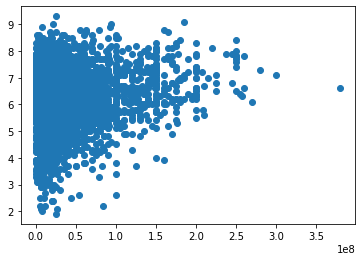

In [963]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(non_null_budget.iloc[:,7])
y = np.array(non_null_budget.iloc[:,15])

plt.scatter(x, y)
plt.show()

In [964]:
non_null_budget.shape

(5003, 17)

In [969]:
non_null_budget.columns

Index(['imdb_id', 'title', 'genres', 'cast', 'director', 'runtimeMinutes',
       'overview', 'budget', 'production_companies', 'release_date',
       'languages', 'poster_link', 'revenue_domestic_BOM',
       'revenue_international_BOM', 'revenue_worldwide_BOM', 'averageRating',
       'numVotes'],
      dtype='object')

In [968]:
non_null_budget.iloc[:,9]

3        1980-07-02
4        1980-12-25
5        1980-02-08
7        1980-09-02
11       1980-05-28
            ...    
10829    2015-10-13
10836    2016-04-02
10837    2016-11-17
10851    2016-07-01
10857    2016-10-08
Name: release_date, Length: 5003, dtype: object

In [972]:
df_date_split = non_null_budget['release_date'].str.split('-', expand=True)
df_date_split[0]

3        1980
4        1980
5        1980
7        1980
11       1980
         ... 
10829    2015
10836    2016
10837    2016
10851    2016
10857    2016
Name: 0, Length: 5003, dtype: object

In [991]:
df_adjusted_analysis = pd.DataFrame(columns = ['Budget', 'Year', 
                                               'Revenue','Rating','Adjusted Budget','Adjusted Revenue'])
list_final_data = []
for i in range(len(non_null_budget)):
    adj_budget = func_adjusted_budget(df_date_split.iloc[i,0],non_null_budget.iloc[i,7])
    adj_revenue = func_adjusted_budget(df_date_split.iloc[i,0],non_null_budget.iloc[i,14])
    df_adjusted_analysis.append({'Budget' : non_null_budget.iloc[i,7], 'Year' : df_date_split.iloc[i,0], 
                                 'Revenue' :  non_null_budget.iloc[i,14], 
                                 'Rating' :  non_null_budget.iloc[i,15], 
                                 'Adjusted Budget' : adj_budget,'Adjusted Revenue' : adj_revenue}, 
                                ignore_index = True)
    list_final_data.append([non_null_budget.iloc[i,7], df_date_split.iloc[i,0], non_null_budget.iloc[i,14], 
                                 non_null_budget.iloc[i,15], adj_budget, adj_revenue])

In [990]:
df_adjusted_analysis

,Budget,Year,Revenue,Rating,Adjusted Budget,Adjusted Revenue


In [980]:
len(df_date_split)

5003

In [992]:
inflation_dict

{'1960': 1.0146,
 '1961': 1.0404278808119998,
 '1962': 1.0797162007421648,
 '1963': 1.1343821668286858,
 '1964': 1.2070711105830039,
 '1965': 1.3048400599699213,
 '1966': 1.4531259307785265,
 '1967': 1.6630893424895303,
 '1968': 1.9846653239724448,
 '1969': 2.497737246052585,
 '1970': 3.3270248869771755,
 '1971': 4.621766671049158,
 '1972': 6.630314977850403,
 '1973': 10.09957329483959,
 '1974': 17.08403502514926,
 '1975': 31.54001026991607,
 '1976': 61.57047637184045,
 '1977': 128.00673042103944,
 '1978': 286.4352322694536,
 '1979': 713.0501692537953,
 '1980': 2015.5838825879252,
 '1981': 6286.013142515986,
 '1982': 20805.96467030124,
 '1983': 71075.87366690773,
 '1984': 253244.9916724314,
 '1985': 934350.0796704825,
 '1986': 3512793.113346708,
 '1987': 13690103.229209151,
 '1988': 55530061.7857216,
 '1989': 236121305.7860794,
 '1990': 1058236670.244869,
 '1991': 4943844927.569467,
 '1992': 23796362323.055145,
 '1993': 117918692983.98936,
 '1994': 599576259396.4159,
 '1995': 313430719

In [993]:
inflation_data

[['2020', '1.23%', '-0.58%'],
 ['2019', '1.81%', '-0.63%'],
 ['2018', '2.44%', '0.31%'],
 ['2017', '2.13%', '0.87%'],
 ['2016', '1.26%', '1.14%'],
 ['2015', '0.12%', '-1.50%'],
 ['2014', '1.62%', '0.16%'],
 ['2013', '1.46%', '-0.60%'],
 ['2012', '2.07%', '-1.09%'],
 ['2011', '3.16%', '1.52%'],
 ['2010', '1.64%', '2.00%'],
 ['2009', '-0.36%', '-4.19%'],
 ['2008', '3.84%', '0.99%'],
 ['2007', '2.85%', '-0.37%'],
 ['2006', '3.23%', '-0.17%'],
 ['2005', '3.39%', '0.72%'],
 ['2004', '2.68%', '0.41%'],
 ['2003', '2.27%', '0.68%'],
 ['2002', '1.59%', '-1.24%'],
 ['2001', '2.83%', '-0.55%'],
 ['2000', '3.38%', '1.19%'],
 ['1999', '2.19%', '0.64%'],
 ['1998', '1.55%', '-0.79%'],
 ['1997', '2.34%', '-0.59%'],
 ['1996', '2.93%', '0.13%'],
 ['1995', '2.81%', '0.20%'],
 ['1994', '2.61%', '-0.34%'],
 ['1993', '2.95%', '-0.08%'],
 ['1992', '3.03%', '-1.21%'],
 ['1991', '4.24%', '-1.16%'],
 ['1990', '5.40%', '0.57%'],
 ['1989', '4.83%', '0.75%'],
 ['1988', '4.08%', '0.41%'],
 ['1987', '3.66%', '1.77%'

In [995]:
inflation_data_df[:15]

,0,1,2,3,4
0,1960,1.46%,-0.39%,1.014600,1.0146
1,1961,1.07%,-0.39%,1.040428,1.0107
2,1962,1.20%,0.13%,1.079716,1.0120
3,1963,1.24%,0.04%,1.134382,1.0124
4,1964,1.28%,0.04%,1.207071,1.0128
5,1965,1.59%,0.31%,1.304840,1.0159
6,1966,3.02%,1.43%,1.453126,1.0302
7,1967,2.77%,-0.24%,1.663089,1.0277
8,1968,4.27%,1.50%,1.984665,1.0427
9,1969,5.46%,1.19%,2.497737,1.0546


In [997]:
1.0146*1.0107

1.02545622

In [1011]:
inflation_dict_df_save = pd.DataFrame.from_dict(inflation_dict_final,orient='index')

In [1013]:
df_try_2 = pd.DataFrame(inflation_dict_final.items())

In [1014]:
df_try_2.rename(columns={0: 'year', 1: 'inflation rate'})

,year,inflation rate
0,1960,1.014600
1,1961,1.025456
2,1962,1.037762
3,1963,1.050630
4,1964,1.064078
...,...,...
56,2016,8.233952
57,2017,8.409336
58,2018,8.614523
59,2019,8.770446


In [1019]:
df_try_2.to_csv('inflation_rate_per_year.csv', header = ['year', 'inflation_rate'])

In [1022]:
inflation_dict_df_load = pd.read_csv('inflation_rate_per_year.csv')

In [1023]:
inflation_dict_df_load

,Unnamed: 0,year,inflation_rate
0,0,1960,1.014600
1,1,1961,1.025456
2,2,1962,1.037762
3,3,1963,1.050630
4,4,1964,1.064078
...,...,...,...
56,56,2016,8.233952
57,57,2017,8.409336
58,58,2018,8.614523
59,59,2019,8.770446


In [1028]:
def func_adjusted_budget(year, budget):
    adjusted_budget = budget/float(dict_from_csv[str(year)])
    return adjusted_budget

In [1031]:
import csv
csv_columns = ['Year','Inflation_rate']
csv_file = "inflation_dictionary.csv"
with open(csv_file, 'w') as f:
    for key in inflation_dict_final.keys():
        f.write("%s,%s\n"%(key,inflation_dict_final[key]))

In [1032]:
import csv

dict_from_csv = {}

with open('inflation_dictionary.csv', mode='r') as inp:
    reader = csv.reader(inp)
    dict_from_csv = {rows[0]:rows[1] for rows in reader}

print(dict_from_csv)

{'1960': '1.0146', '1961': '1.02545622', '1962': '1.03776169464', '1963': '1.050629939653536', '1964': '1.064078002881101', '1965': '1.0809968431269106', '1966': '1.1136429477893433', '1967': '1.144490857443108', '1968': '1.1933606170559288', '1969': '1.2585181067471825', '1970': '1.332015564181218', '1971': '1.389159031884592', '1972': '1.4345845322272182', '1973': '1.5232418563188603', '1974': '1.6915600814420944', '1975': '1.8461686728859017', '1976': '1.9521387547095523', '1977': '2.0790277737656733', '1978': '2.2376575929039944', '1979': '2.4893940721056937', '1980': '2.826706968876015', '1981': '3.1187057987609075', '1982': '3.309882464224951', '1983': '3.4161296913265717', '1984': '3.5630232680536142', '1985': '3.689510594069518', '1986': '3.7596112953568386', '1987': '3.8972130687668987', '1988': '4.0562193619725875', '1989': '4.252134757155863', '1990': '4.48175003404228', '1991': '4.671776235485672', '1992': '4.813331055420888', '1993': '4.955324321555805', '1994': '5.0846582

In [1033]:
func_adjusted_budget(2001,48000000)

7901545.23550806

In [1034]:
df_adjusted_analysis = pd.DataFrame(columns = ['Budget', 'Year', 
                                               'Revenue','Rating','Adjusted Budget','Adjusted Revenue'])
list_final_data = []
for i in range(len(non_null_budget)):
    adj_budget = func_adjusted_budget(df_date_split.iloc[i,0],non_null_budget.iloc[i,7])
    adj_revenue = func_adjusted_budget(df_date_split.iloc[i,0],non_null_budget.iloc[i,14])
    list_final_data.append([non_null_budget.iloc[i,7], df_date_split.iloc[i,0], non_null_budget.iloc[i,14], 
                                 non_null_budget.iloc[i,15], adj_budget, adj_revenue])

In [1035]:
list_final_data

[[3500000.0, '1980', 83453539.0, 7.7, 1238189.8932352746, 29523236.727004524],
 [15000000.0, '1980', 19853892.0, 6.9, 5306528.113865463, 7023682.404509907],
 [4800000.0, '1980', 22743674.0, 6.3, 1698088.9964369482, 8045996.366239398],
 [7200000.0, '1980', 12729675.0, 7.3, 2547133.494655422, 4503358.551191356],
 [4500000.0, '1980', 7206823.0, 7.1, 1591958.4341596388, 2549547.257410149],
 [4500000.0, '1980', 58853106.0, 5.8, 1591958.4341596388, 20820377.438486945],
 [27000000.0, '1980', 115229890.0, 7.9, 9551750.604957834, 40764710.056174986],
 [6000000.0, '1980', 39918650.0, 7.2, 2122611.245546185, 14121962.56617037],
 [15000000.0, '1980', 67182787.0, 7.5, 5306528.113865463, 23767156.53222234],
 [6500000.0, '1980', 31899000.0, 7.1, 2299495.5160083673, 11284862.686946293],
 [5000000.0, '1980', 26023860.0, 8.2, 1768842.704621821, 9206422.981419925],
 [18000000.0, '1980', 538375067.0, 8.7, 6367833.736638555, 190460161.92264682],
 [35000000.0, '1980', 27181317.0, 6.5, 12381898.932352746, 96

In [ ]:
list_final_data

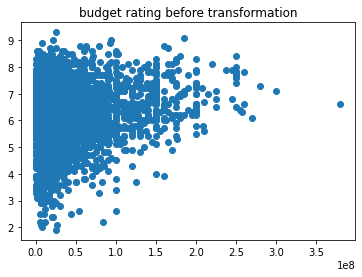

In [1055]:
# budget rating before
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,0])
y = np.array(df_adjusted_analysis.iloc[:,3])
plt.title('budget rating before transformation')
plt.scatter(x, y)
plt.show()

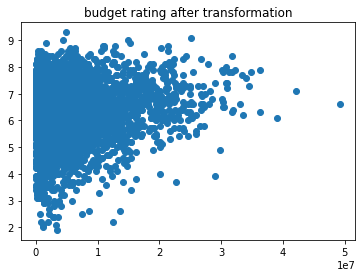

In [1056]:
# budget rating after
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,4])
y = np.array(df_adjusted_analysis.iloc[:,3])
plt.title('budget rating after transformation')
plt.scatter(x, y)
plt.show()

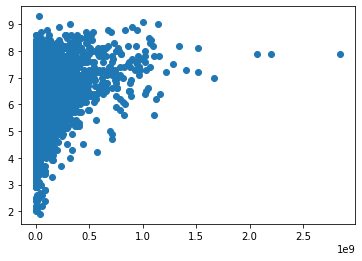

In [1044]:
# revenue rating before
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,2])
y = np.array(df_adjusted_analysis.iloc[:,3])

plt.scatter(x, y)
plt.show()

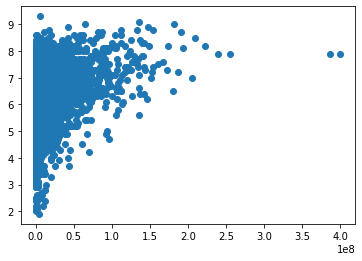

In [1045]:
# revenue rating after
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,5])
y = np.array(df_adjusted_analysis.iloc[:,3])

plt.scatter(x, y)
plt.show()

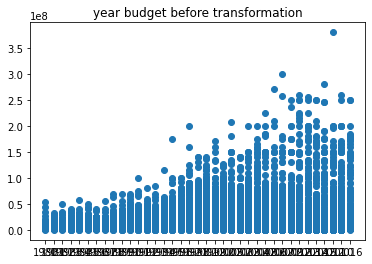

In [1053]:
# year budget before
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,1])
y = np.array(df_adjusted_analysis.iloc[:,0])

plt.scatter(x, y)
plt.title('year budget before transformation')
plt.show()

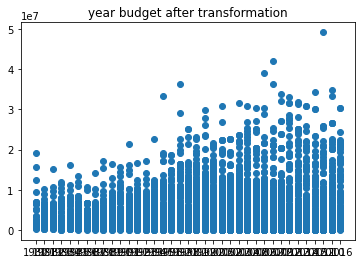

In [1054]:
# year budget after
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,1])
y = np.array(df_adjusted_analysis.iloc[:,4])
plt.title('year budget after transformation')
plt.scatter(x, y)
plt.show()

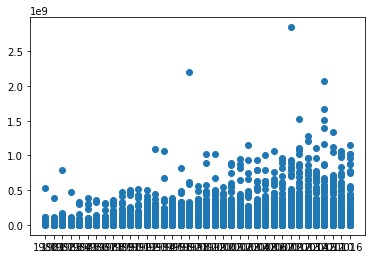

In [1050]:
# year revenue before
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,1])
y = np.array(df_adjusted_analysis.iloc[:,2])

plt.scatter(x, y)
plt.show()

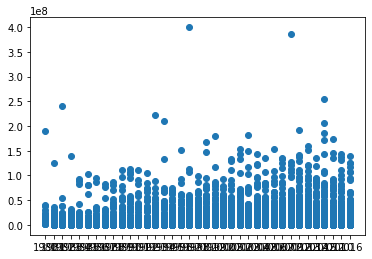

In [1051]:
# year revenue after
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_adjusted_analysis.iloc[:,1])
y = np.array(df_adjusted_analysis.iloc[:,5])

plt.scatter(x, y)
plt.show()

In [1039]:
df_adjusted_analysis = pd.DataFrame(list_final_data)

In [1041]:
df_adjusted_analysis[:]

,0,1,2,3,4,5
0,3500000.0,1980,83453539.0,7.7,1.238190e+06,2.952324e+07
1,15000000.0,1980,19853892.0,6.9,5.306528e+06,7.023682e+06
2,4800000.0,1980,22743674.0,6.3,1.698089e+06,8.045996e+06
3,7200000.0,1980,12729675.0,7.3,2.547133e+06,4.503359e+06
4,4500000.0,1980,7206823.0,7.1,1.591958e+06,2.549547e+06
...,...,...,...,...,...,...
4998,768.0,2015,239770.0,7.7,9.444757e+01,2.948658e+04
4999,1600000.0,2016,36386.0,6.9,1.943174e+05,4.419020e+03
5000,5000000.0,2016,9588282.0,7.3,6.072418e+05,1.164481e+06
5001,5000000.0,2016,13099931.0,5.2,6.072418e+05,1.590965e+06
